In [310]:
%load_ext autoreload
%autoreload 2 
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [311]:
import cleaner
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import seaborn as sns

In [312]:
file = 'data\measurements.csv'

data = cleaner.read_csv(file)

In [313]:
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


# Data Cleaning

**Phase 1**

In [314]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [315]:
cleaner.dup_nul(data)

Duplicate Rows: 0
Null Values:
distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64


There a good amount of nan values that need to be taken care of.the refills should be easy, replace them with none or n/a. specials need a closer look to see what to fill them with. The temp inside can probably be replaced with the average temp of the column.

In [316]:
data.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')

In [317]:
cleaner.new_col_name(data, new_names=['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'ac', 'rain', 'sun', 'refill_liters',
       'refill_gas'])

In [318]:
cleaner.col_info(data, 'gas_type')


Unique:
 ['E10' 'SP98']

Describe:
 count      388
unique       2
top       SP98
freq       228
Name: gas_type, dtype: object

Value Counts:
 gas_type
SP98    228
E10     160
Name: count, dtype: int64


In [319]:
cleaner.dup_nul(data['gas_type'])

Duplicate Rows: 386
Null Values:
0


In [320]:
cleaner.col_info(data, 'specials')


Unique:
 [nan 'AC rain' 'AC' 'rain' 'snow' 'AC snow' 'half rain half sun' 'sun'
 'AC sun' 'sun ac' 'ac' 'AC Sun' 'ac rain']

Describe:
 count       93
unique      12
top       rain
freq        32
Name: specials, dtype: object

Value Counts:
 specials
rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: count, dtype: int64


In [321]:
cleaner.dup_nul(data['specials'])

Duplicate Rows: 375
Null Values:
295


The unique need to be formatted to 'AC', 'Rain', 'Sun', 'Snow', 'AC, Rain', 'AC, Sun', 'AC, Snow', 'Half Rain/Sun', and 'none'. Null's will be filled by none.

In [322]:
cleaner.col_info(data, 'refill_gas')



Unique:
 ['E10' nan 'SP98']

Describe:
 count       13
unique       2
top       SP98
freq         8
Name: refill_gas, dtype: object

Value Counts:
 refill_gas
SP98    8
E10     5
Name: count, dtype: int64


In [323]:
cleaner.dup_nul(data['refill_gas'])


Duplicate Rows: 385
Null Values:
375


Just needs to take care of the nan's. They will be replaced by no refill

In [324]:
cleaner.col_info(data, 'refill_liters')



Unique:
 ['45' nan '37,6' '37,7' '38' '38,3' '10' '39' '41' '37' '37,2']

Describe:
 count     13
unique    10
top       45
freq       2
Name: refill_liters, dtype: object

Value Counts:
 refill_liters
45      2
37,7    2
39      2
37,6    1
38      1
38,3    1
10      1
41      1
37      1
37,2    1
Name: count, dtype: int64


In [325]:
cleaner.dup_nul(data['refill_liters'])


Duplicate Rows: 377
Null Values:
375


The nan's will be replaced by 0.

In [326]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
speed,388.0,41.927835,13.598524,14.0,32.75,40.5,50.0,90.0
temp_outside,388.0,11.358247,6.991542,-5.0,7.00,10.0,16.0,31.0
ac,388.0,0.077320,0.267443,0.0,0.00,0.0,0.0,1.0
rain,388.0,0.123711,0.329677,0.0,0.00,0.0,0.0,1.0
sun,388.0,0.082474,0.275441,0.0,0.00,0.0,0.0,1.0


**Formatting temp_inside, then fill null's**

In [327]:
cleaner.replace_val(data, 'temp_inside', ',', '.')

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28,5,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [328]:
cleaner.cal_col_mean(data, 'temp_inside', 'y')

21.929521276595743

The temp_inside column will have its nan's filled with 21,93

In [329]:
cleaner.fill_nan(data, 'temp_inside', '21.9')

c:\Users\dylan\OneDrive\Documents\Dylans Doc's\Dylan's courses\2024 Courses\IronHack\Week 11\Tech Challenge\technical_challenge_DA\cleaner.py:114: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '21.9' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[column].fillna(value, inplace=True)


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28,5,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [330]:
cleaner.dup_nul(data['temp_inside'])

Duplicate Rows: 374
Null Values:
0


In [331]:
cleaner.fill_nan(data, 'specials', 'none')
cleaner.fill_nan(data, 'refill_liters', '0')
cleaner.fill_nan(data, 'refill_gas', 'no')


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28,5,26,21.5,12,none,E10,0,0,0,45,E10
1,12,"4,2",30,21.5,13,none,E10,0,0,0,0,no
2,"11,2","5,5",38,21.5,15,none,E10,0,0,0,0,no
3,"12,9","3,9",36,21.5,14,none,E10,0,0,0,0,no
4,"18,5","4,5",46,21.5,15,none,E10,0,0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,24.5,18,none,SP98,0,0,0,0,no
384,"16,1","4,3",38,25.0,31,AC,SP98,1,0,0,0,no
385,16,"3,8",45,25.0,19,none,SP98,0,0,0,0,no
386,"15,4","4,6",42,25.0,31,AC,SP98,1,0,0,0,no


In [332]:
cleaner.dup_nul(data)

Duplicate Rows: 0
Null Values:
distance         0
consume          0
speed            0
temp_inside      0
temp_outside     0
specials         0
gas_type         0
ac               0
rain             0
sun              0
refill_liters    0
refill_gas       0
dtype: int64


**Phase 2: formatting**

In [333]:
cleaner.col_info(data, 'specials')


Unique:
 ['none' 'AC rain' 'AC' 'rain' 'snow' 'AC snow' 'half rain half sun' 'sun'
 'AC sun' 'sun ac' 'ac' 'AC Sun' 'ac rain']

Describe:
 count      388
unique      13
top       none
freq       295
Name: specials, dtype: object

Value Counts:
 specials
none                  295
rain                   32
sun                    27
AC rain                 9
ac                      8
AC                      6
snow                    3
sun ac                  3
AC snow                 1
half rain half sun      1
AC sun                  1
AC Sun                  1
ac rain                 1
Name: count, dtype: int64


In [334]:
cleaner.replace_val(data, 'specials', 'AC', 'ac')
cleaner.replace_val(data, 'specials', 'AC rain', 'ac rain')
# cleaner.replace_val(data, 'specials', 'ac rain', 'AC Rain')
cleaner.replace_val(data, 'specials', 'AC sun', 'ac sun')
cleaner.replace_val(data, 'specials', 'AC snow', 'ac snow')
cleaner.replace_val(data, 'specials', 'half rain half sun', 'half rain/sun')
cleaner.replace_val(data, 'specials', 'sun ac', 'ac sun')
cleaner.replace_val(data, 'specials', 'Sun AC', 'ac sun')
cleaner.replace_val(data, 'specials', 'ac Sun', 'ac sun')
# cleaner.replace_val(data, 'specials', 'sun', 'Sun')
# cleaner.replace_val(data, 'specials', 'snow', 'Snow')
# cleaner.replace_val(data, 'specials', 'none', 'None')


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28,5,26,21.5,12,none,E10,0,0,0,45,E10
1,12,"4,2",30,21.5,13,none,E10,0,0,0,0,no
2,"11,2","5,5",38,21.5,15,none,E10,0,0,0,0,no
3,"12,9","3,9",36,21.5,14,none,E10,0,0,0,0,no
4,"18,5","4,5",46,21.5,15,none,E10,0,0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,24.5,18,none,SP98,0,0,0,0,no
384,"16,1","4,3",38,25.0,31,ac,SP98,1,0,0,0,no
385,16,"3,8",45,25.0,19,none,SP98,0,0,0,0,no
386,"15,4","4,6",42,25.0,31,ac,SP98,1,0,0,0,no


In [335]:
cleaner.col_info(data, 'specials')



Unique:
 ['none' 'ac rain' 'ac' 'rain' 'snow' 'ac snow' 'half rain/sun' 'sun'
 'ac sun']

Describe:
 count      388
unique       9
top       none
freq       295
Name: specials, dtype: object

Value Counts:
 specials
none             295
rain              32
sun               27
ac                14
ac rain           10
ac sun             5
snow               3
ac snow            1
half rain/sun      1
Name: count, dtype: int64


from taking a moment to thing i think changing snow and ac snow based off the ac, rain and sun columns is the way to go. there only a few values depending on what the other columns are cnd fix this mis-match

In [336]:
cleaner.replace_val(data, 'distance', ',', '.')
cleaner.replace_val(data, 'consume', ',', '.')
cleaner.replace_val(data, 'refill_liters', ',', '.')



,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28,5,26,21.5,12,none,E10,0,0,0,45,E10
1,12,4.2,30,21.5,13,none,E10,0,0,0,0,no
2,11.2,5.5,38,21.5,15,none,E10,0,0,0,0,no
3,12.9,3.9,36,21.5,14,none,E10,0,0,0,0,no
4,18.5,4.5,46,21.5,15,none,E10,0,0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,3.7,39,24.5,18,none,SP98,0,0,0,0,no
384,16.1,4.3,38,25.0,31,ac,SP98,1,0,0,0,no
385,16,3.8,45,25.0,19,none,SP98,0,0,0,0,no
386,15.4,4.6,42,25.0,31,ac,SP98,1,0,0,0,no


In [337]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    388 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       388 non-null    object
 6   gas_type       388 non-null    object
 7   ac             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill_liters  388 non-null    object
 11  refill_gas     388 non-null    object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [338]:
cleaner.col_type(data, 'distance', 'float')
cleaner.col_type(data, 'consume', 'float')
cleaner.col_type(data, 'temp_inside', 'float')
cleaner.col_type(data, 'refill_liters', 'float')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    388 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       388 non-null    object 
 6   gas_type       388 non-null    object 
 7   ac             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill_liters  388 non-null    float64
 11  refill_gas     388 non-null    object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


All finished, the 'consume' column is our target for later predictions.

In [339]:
def fix_match(row):
    if row['specials'] == 'snow':
       if row['rain'] == 1 and row['ac'] != 1 and row['sun'] != 1:
            return 'rain'
    elif row['specials'] == 'ac snow':
        if row['ac'] == 1 and row['rain'] == 1 and row['sun'] != 1:
            return 'ac rain'
        elif row['rain'] == 1 and row['ac'] != 1 and row['sun'] != 1:
            return 'rain'

    return row['specials']

In [340]:
data['specials'] = data.apply(fix_match, axis=1)

In [341]:
cleaner.col_info(data, 'specials')


Unique:
 ['none' 'ac rain' 'ac' 'rain' 'half rain/sun' 'sun' 'ac sun']

Describe:
 count      388
unique       7
top       none
freq       295
Name: specials, dtype: object

Value Counts:
 specials
none             295
rain              35
sun               27
ac                14
ac rain           11
ac sun             5
half rain/sun      1
Name: count, dtype: int64


From the looks at the data set we dont need the ac, sun, and rain columns. They seem to mimic the specials column, and that will be turned into dummies for the prediction part. so they will be dropped.

In [342]:
data.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'ac', 'rain', 'sun', 'refill_liters',
       'refill_gas'],
      dtype='object')

In [343]:
data = cleaner.col_order(data, ['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'specials', 'gas_type', 'refill_liters','refill_gas'])

In [344]:
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,none,E10,45.0,E10
1,12.0,4.2,30,21.5,13,none,E10,0.0,no
2,11.2,5.5,38,21.5,15,none,E10,0.0,no
3,12.9,3.9,36,21.5,14,none,E10,0.0,no
4,18.5,4.5,46,21.5,15,none,E10,0.0,no
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,none,SP98,0.0,no
384,16.1,4.3,38,25.0,31,ac,SP98,0.0,no
385,16.0,3.8,45,25.0,19,none,SP98,0.0,no
386,15.4,4.6,42,25.0,31,ac,SP98,0.0,no


# EDA

**Phase 1**

In [345]:
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,none,E10,45.0,E10
1,12.0,4.2,30,21.5,13,none,E10,0.0,no
2,11.2,5.5,38,21.5,15,none,E10,0.0,no
3,12.9,3.9,36,21.5,14,none,E10,0.0,no
4,18.5,4.5,46,21.5,15,none,E10,0.0,no
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,none,SP98,0.0,no
384,16.1,4.3,38,25.0,31,ac,SP98,0.0,no
385,16.0,3.8,45,25.0,19,none,SP98,0.0,no
386,15.4,4.6,42,25.0,31,ac,SP98,0.0,no


In [346]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    388 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       388 non-null    object 
 6   gas_type       388 non-null    object 
 7   refill_liters  388 non-null    float64
 8   refill_gas     388 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 27.4+ KB


In [347]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,388.0,19.652835,22.667837,1.3,11.80,14.6,19.0,216.1
consume,388.0,4.912371,1.033172,3.3,4.30,4.7,5.3,12.2
speed,388.0,41.927835,13.598524,14.0,32.75,40.5,50.0,90.0
temp_inside,388.0,21.928608,0.994679,19.0,21.50,22.0,22.5,25.5
temp_outside,388.0,11.358247,6.991542,-5.0,7.00,10.0,16.0,31.0
refill_liters,388.0,1.243557,6.856419,0.0,0.00,0.0,0.0,45.0


In [348]:
cleaner.dup_nul(data)

Duplicate Rows: 0
Null Values:
distance         0
consume          0
speed            0
temp_inside      0
temp_outside     0
specials         0
gas_type         0
refill_liters    0
refill_gas       0
dtype: int64


In [349]:
data.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'refill_liters', 'refill_gas'],
      dtype='object')

In [350]:
cleaner.col_val_count(data, 'specials'), cleaner.col_val_count(data, 'gas_type'), cleaner.col_val_count(data, 'refill_gas');


Value Counts:
 specials
none             295
rain              35
sun               27
ac                14
ac rain           11
ac sun             5
half rain/sun      1
Name: count, dtype: int64

Value Counts:
 gas_type
SP98    228
E10     160
Name: count, dtype: int64

Value Counts:
 refill_gas
no      375
SP98      8
E10       5
Name: count, dtype: int64


**Phase 2: Univariate**

In [351]:
# Creating a crosstab table for the 'consume' column, counting occurrences for each unique value
ct_dc = pd.crosstab(index = data["consume"],  # Make a crosstab
                              columns="count")      # Name the count column

ct_dc = ct_dc.sort_values(by='count', ascending=False)
ct_dc

col_0,count
consume,
4.5,27
5.0,27
4.6,22
4.7,21
4.3,20
4.1,20
4.8,19
5.1,19
4.4,17


In [ ]:
(ct_dc/ct_dc.sum()).round(2)

C:\Users\dylan\AppData\Local\Temp\ipykernel_43272\2823304092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='consume', y='count', data=ct_dc, palette="Set2")


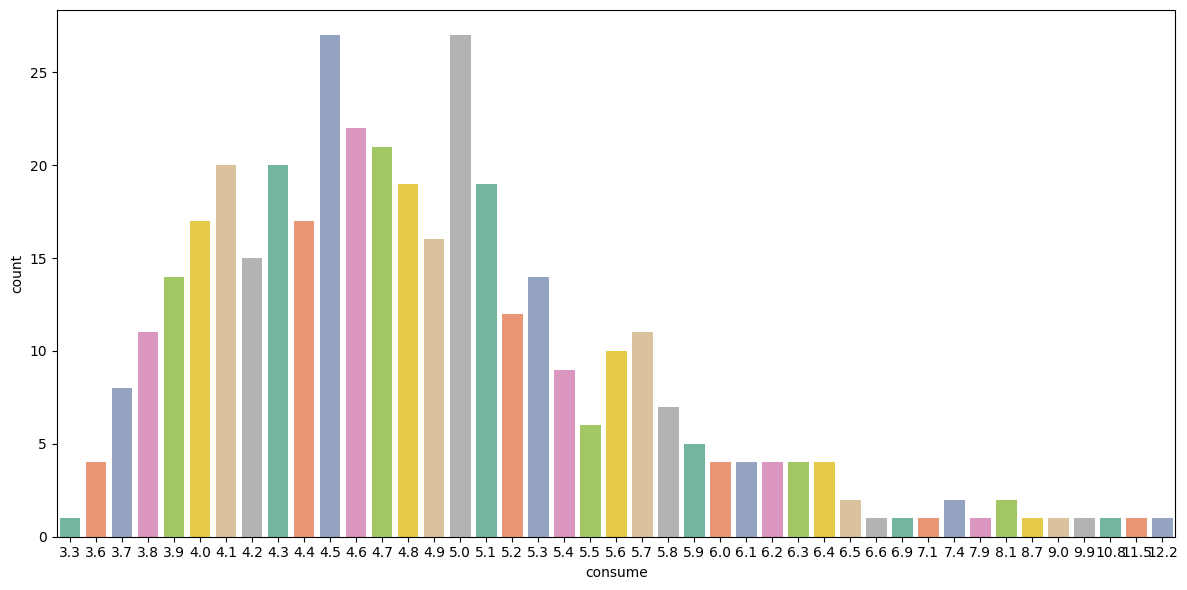

In [353]:
# a bar-plot of the count of refill_liters
plt.figure(figsize=(12,6))  # increase the figure size
sns.barplot(x='consume', y='count', data=ct_dc, palette="Set2")
plt.tight_layout()  # ensure the labels fit within the figure

We see that the counts for 4.5 and 5.0 are the highest meaning most of the time thats whats being consumed during a drive.

In [386]:
# Creating a crosstab table for the 'speed' column, counting occurrences for each unique value
ct_dss = pd.crosstab(index = data["speed"],  # Make a crosstab
                              columns="count")      # Name the count column

ct_dss = ct_dss.sort_values(by='count', ascending=False)
ct_dss

col_0,count
speed,
42,18
43,17
38,16
26,15
40,15
36,15
33,15
44,12
37,12


In [387]:
(ct_dss/ct_dss.sum()).round(2)

col_0,count
speed,
42,0.05
43,0.04
38,0.04
26,0.04
40,0.04
36,0.04
33,0.04
44,0.03
37,0.03


C:\Users\dylan\AppData\Local\Temp\ipykernel_43272\3524982829.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='speed', y='count', data=ct_dss, palette="Set2")


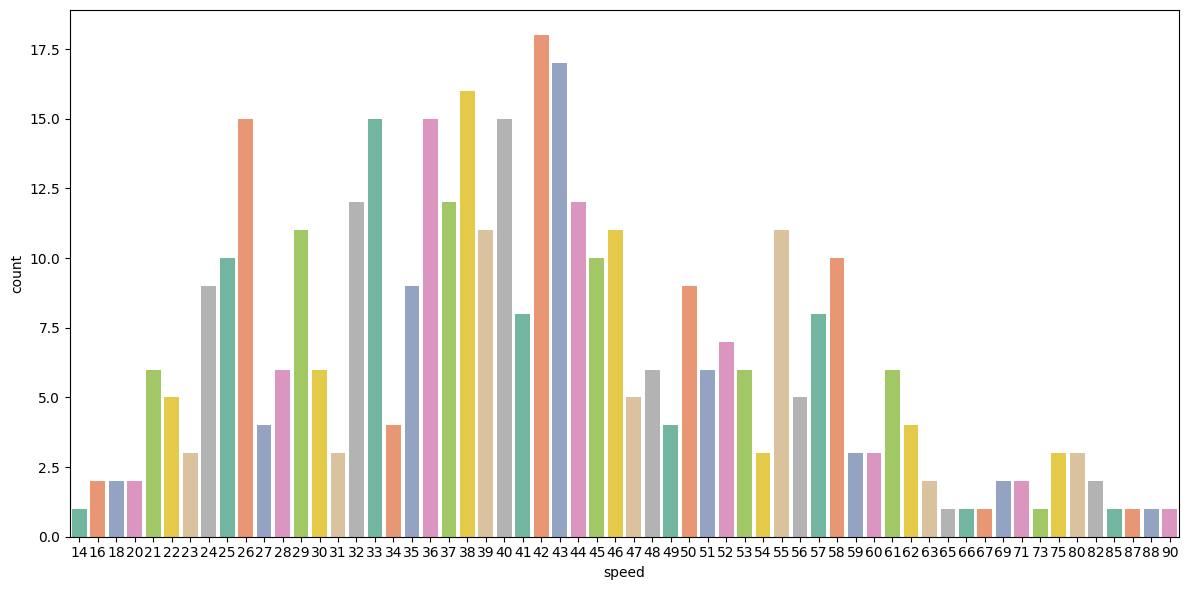

In [388]:
# a bar-plot of the count of refill_liters
plt.figure(figsize=(12,6))  # increase the figure size
sns.barplot(x='speed', y='count', data=ct_dss, palette="Set2")
plt.tight_layout()  # ensure the labels fit within the figure

We see that the speed te driver is going most of the time is 42 and 43 mph/kph.

In [357]:
# Creating a crosstab table for the 'temp_inside' column, counting occurrences for each unique value
ct_dti = pd.crosstab(index = data["temp_inside"],  # Make a crosstab
                              columns="count")      # Name the count column

ct_dti = ct_dti.sort_values(by='count', ascending=False)
ct_dti

col_0,count
temp_inside,
21.5,133
22.0,102
22.5,59
20.0,25
21.0,13
23.0,13
21.9,12
25.0,12
24.5,7


In [358]:
(ct_dti/ct_dti.sum()).round(2)

col_0,count
temp_inside,
21.5,0.34
22.0,0.26
22.5,0.15
20.0,0.06
21.0,0.03
23.0,0.03
21.9,0.03
25.0,0.03
24.5,0.02


C:\Users\dylan\AppData\Local\Temp\ipykernel_43272\2734262406.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='temp_inside', y='count', data=ct_dti, palette="Set2")


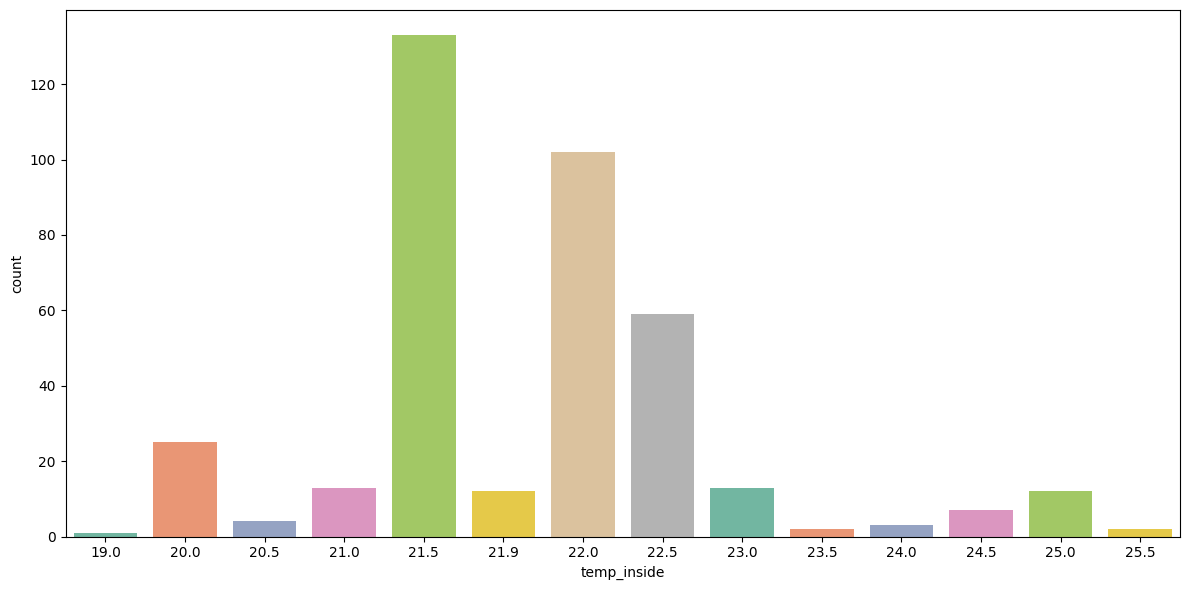

In [359]:
# a bar-plot of the count of refill_liters
plt.figure(figsize=(12,6))  # increase the figure size
sns.barplot(x='temp_inside', y='count', data=ct_dti, palette="Set2")
plt.tight_layout()  # ensure the labels fit within the figure

The temp in the car most of the time is 21.5 second being 22.0.

In [360]:
# Creating a crosstab table for the 'temp_outside' column, counting occurrences for each unique value
ct_dto = pd.crosstab(index = data["temp_outside"],  # Make a crosstab
                              columns="count")      # Name the count column

ct_dto = ct_dto.sort_values(by='count', ascending=False)
ct_dto

col_0,count
temp_outside,
8,31
10,31
7,28
6,21
11,20
9,20
18,19
12,17
4,17


In [389]:
(ct_dto/ct_dto.sum()).round(2)

col_0,count
temp_outside,
8,0.08
10,0.08
7,0.07
6,0.05
11,0.05
9,0.05
18,0.05
12,0.04
4,0.04


C:\Users\dylan\AppData\Local\Temp\ipykernel_43272\151059782.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='temp_outside', y='count', data=ct_dto, palette="Set2")


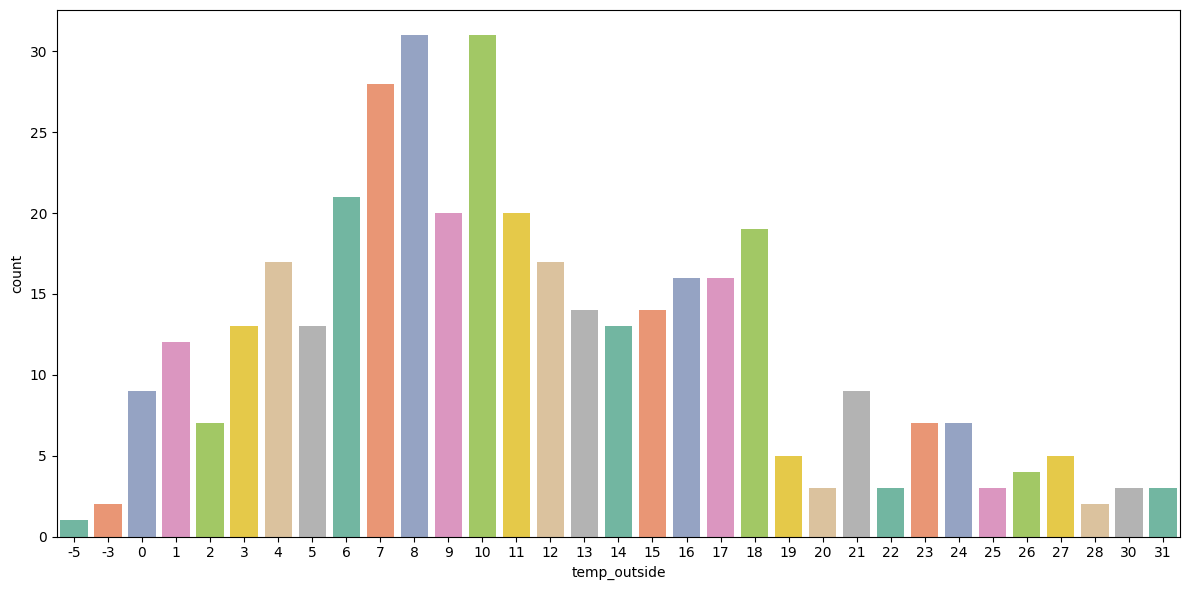

In [362]:
# a bar-plot of the count of refill_liters
plt.figure(figsize=(12,6))  # increase the figure size
sns.barplot(x='temp_outside', y='count', data=ct_dto, palette="Set2")
plt.tight_layout()  # ensure the labels fit within the figure

the temp outside most of the time is 8 or 10.

In [363]:
# Creating a crosstab table for the 'muscle_group' column, counting occurrences for each unique value
ct_ds = pd.crosstab(index = data["specials"],  # Make a crosstab
                              columns="count")      # Name the count column

ct_ds = ct_ds.sort_values(by='count', ascending=False)
ct_ds

col_0,count
specials,
none,295
rain,35
sun,27
ac,14
ac rain,11
ac sun,5
half rain/sun,1


In [364]:
(ct_ds/ct_ds.sum()).round(2)

col_0,count
specials,
none,0.76
rain,0.09
sun,0.07
ac,0.04
ac rain,0.03
ac sun,0.01
half rain/sun,0.00


C:\Users\dylan\AppData\Local\Temp\ipykernel_43272\106914606.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='specials', y='count', data=ct_ds, palette="Set2")


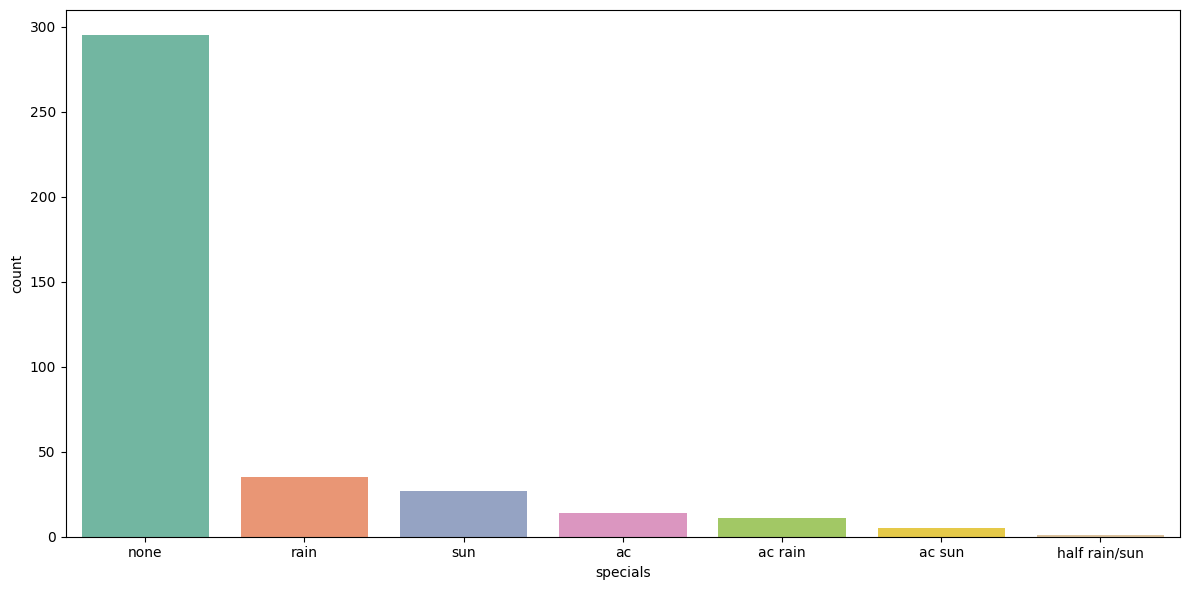

In [365]:
# a bar-plot of the count of muscle group
plt.figure(figsize=(12,6))  # increase the figure size
sns.barplot(x='specials', y='count', data=ct_ds, palette="Set2")
plt.tight_layout()  # ensure the labels fit within the figure

Here we see that we have more days where no specials events happened then did. After that we see that rainy days were the most recorded, then sun and so on and so fourth. From looking at it we should see a good coralation between rainy day and consumed gas as well as with the temp inside and outside.

In [366]:
# Creating a crosstab table for the 'muscle_group' column, counting occurrences for each unique value
ct_dg = pd.crosstab(index = data["gas_type"],  # Make a crosstab
                              columns="count")      # Name the count column

ct_dg = ct_dg.sort_values(by='count', ascending=False)
ct_dg

col_0,count
gas_type,
SP98,228
E10,160


In [367]:
(ct_dg/ct_dg.sum()).round(2)

col_0,count
gas_type,
SP98,0.59
E10,0.41


C:\Users\dylan\AppData\Local\Temp\ipykernel_43272\3589228495.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gas_type', y='count', data=ct_dg, palette="Set2")


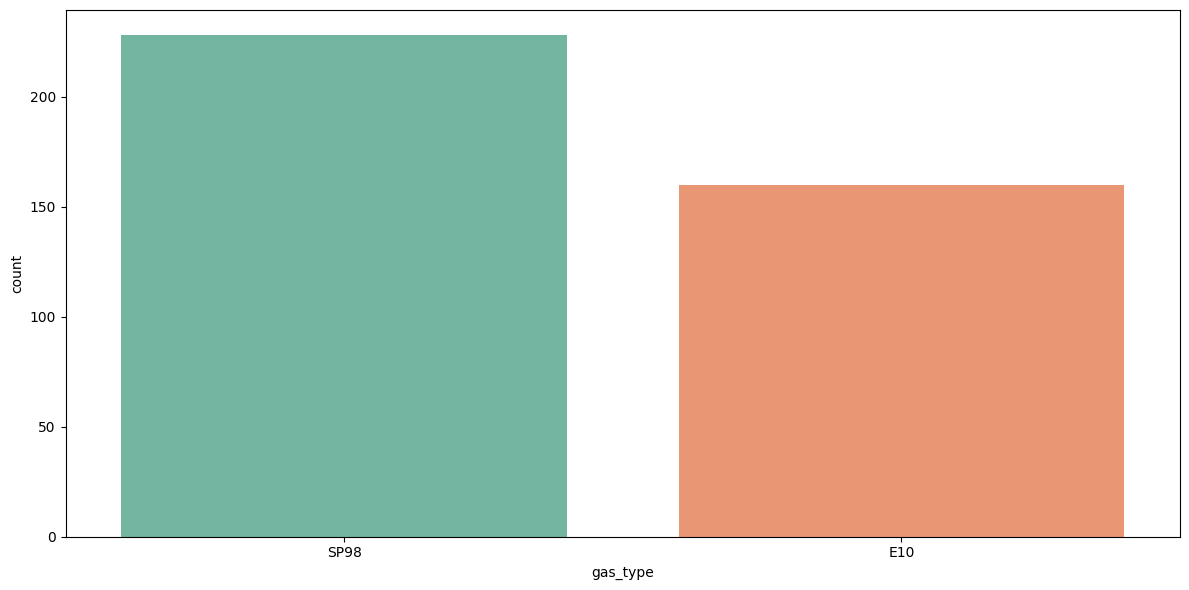

In [368]:
# a bar-plot of the count of muscle group
plt.figure(figsize=(12,6))  # increase the figure size
sns.barplot(x='gas_type', y='count', data=ct_dg, palette="Set2")
plt.tight_layout()  # ensure the labels fit within the figure

The gas type the user got most of the time is SP98.

In [369]:
# Creating a crosstab table for the 'refill_liters' column, counting occurrences for each unique value
ct_drl = pd.crosstab(index = data["refill_liters"],  # Make a crosstab
                              columns="count")      # Name the count column

ct_drl = ct_drl.sort_values(by='count', ascending=False)
ct_drl

col_0,count
refill_liters,
0.0,375
37.7,2
39.0,2
45.0,2
10.0,1
37.0,1
37.2,1
37.6,1
38.0,1


In [370]:
(ct_drl/ct_drl.sum()).round(2)

col_0,count
refill_liters,
0.0,0.97
37.7,0.01
39.0,0.01
45.0,0.01
10.0,0.00
37.0,0.00
37.2,0.00
37.6,0.00
38.0,0.00


C:\Users\dylan\AppData\Local\Temp\ipykernel_43272\1143536333.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='refill_liters', y='count', data=ct_drl, palette="Set2")


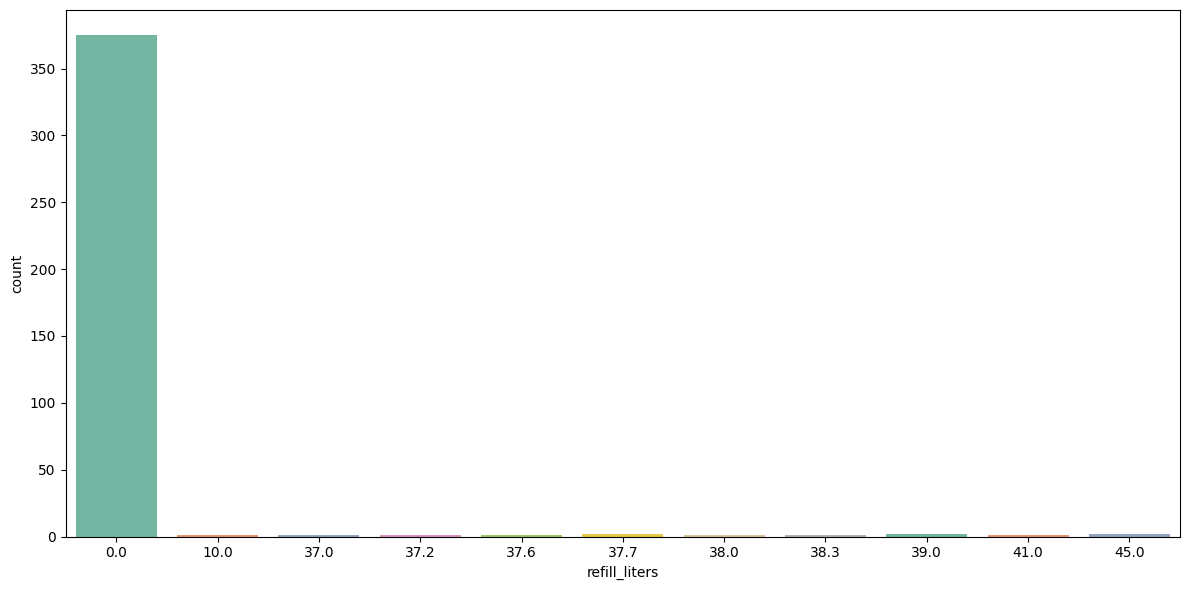

In [371]:
# a bar-plot of the count of refill_liters
plt.figure(figsize=(12,6))  # increase the figure size
sns.barplot(x='refill_liters', y='count', data=ct_drl, palette="Set2")
plt.tight_layout()  # ensure the labels fit within the figure

most of the time the user did not get refills, if he did he got around 37.7 or 37.6.

In [372]:
# Creating a crosstab table for the 'muscle_group' column, counting occurrences for each unique value
ct_dr = pd.crosstab(index = data["refill_gas"],  # Make a crosstab
                              columns="count")      # Name the count column

ct_dr = ct_dr.sort_values(by='count', ascending=False)
ct_dr

col_0,count
refill_gas,
no,375
SP98,8
E10,5


In [373]:
(ct_dr/ct_dr.sum()).round(2)

col_0,count
refill_gas,
no,0.97
SP98,0.02
E10,0.01


C:\Users\dylan\AppData\Local\Temp\ipykernel_43272\3690115798.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='refill_gas', y='count', data=ct_dr, palette="Set2")


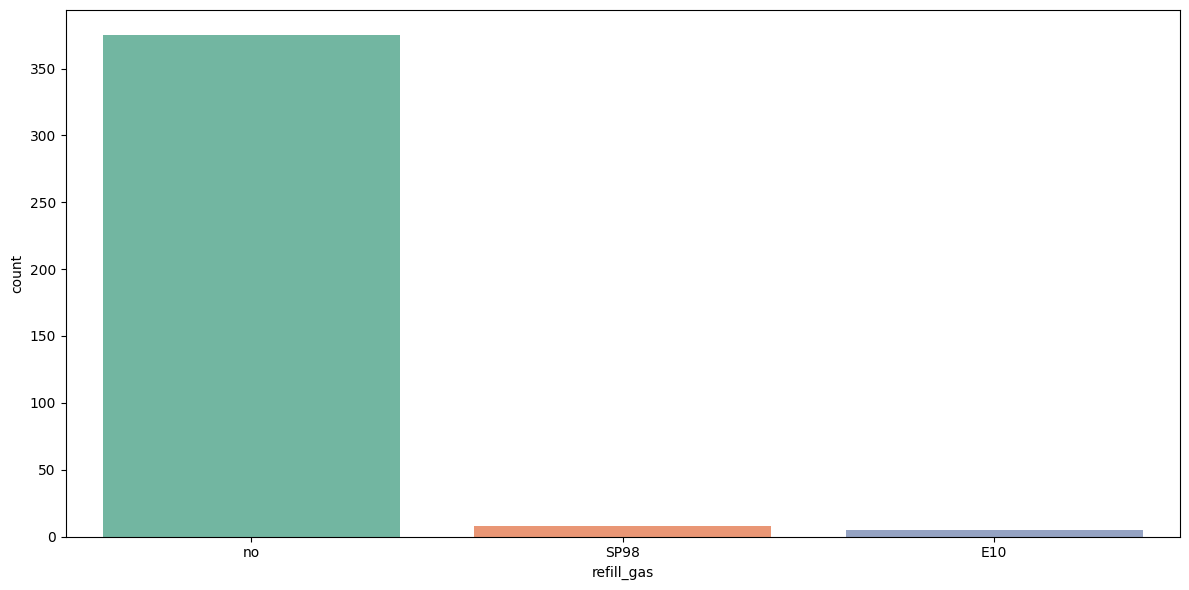

In [374]:
# a bar-plot of the count of muscle group
plt.figure(figsize=(12,6))  # increase the figure size
sns.barplot(x='refill_gas', y='count', data=ct_dr, palette="Set2")
plt.tight_layout()  # ensure the labels fit within the figure

most of the time the user did not get a refill. when he did get it was mainly for the gas type SP98.

In [375]:
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,none,E10,45.0,E10
1,12.0,4.2,30,21.5,13,none,E10,0.0,no
2,11.2,5.5,38,21.5,15,none,E10,0.0,no
3,12.9,3.9,36,21.5,14,none,E10,0.0,no
4,18.5,4.5,46,21.5,15,none,E10,0.0,no
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,none,SP98,0.0,no
384,16.1,4.3,38,25.0,31,ac,SP98,0.0,no
385,16.0,3.8,45,25.0,19,none,SP98,0.0,no
386,15.4,4.6,42,25.0,31,ac,SP98,0.0,no


In [376]:
data.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'refill_liters', 'refill_gas'],
      dtype='object')

## Insights

- We see that the counts for 4.5 (count 27, p .07) and 5.0 (count 27, p .07) are the highest meaning most of the time thats whats being consumed during a drive.
- We see that the speed te driver is going most of the time is 42 (count 18, p.05) and 43 (count 17, p.04) mph/kph.
- The temp in the car most of the time is 21.5(count 133, p.34) second being 22.0.(count 102, p .26)
- the temp outside most of the time is 8 (count 31, p .08 ) or 10 (count 31, p .08).
- Here we see that we have more days where no specials (count 295, p .76) events happened then did. After that we see that rainy days were the most recorded (count 35, p .09), then sun (count 27, p .07) and so on and so fourth. From looking at it we should see a good coralation between rainy day and consumed gas as well as with the temp inside and outside.
- The gas type the user got most of the time is SP98 (count 228, p .59).
- most of the time the user did not get refills (count 375, p.97), if he did he got around 37.7 (count 2, p .01) or 37.6 (count 2, p .01).
- most of the time the user did not get a refill (count 375, p) .97. when he did get it was mainly for the gas type SP98 (count 8, p .02).



**Phase 2: bivariate**

In [377]:
ct_d_g_s = pd.crosstab(data['gas_type'], data['specials'])

ct_d_g_s.T

gas_type,E10,SP98
specials,,
ac,2,12
ac rain,4,7
ac sun,2,3
half rain/sun,0,1
none,130,165
rain,12,23
sun,10,17


<Axes: xlabel='specials', ylabel='gas_type'>

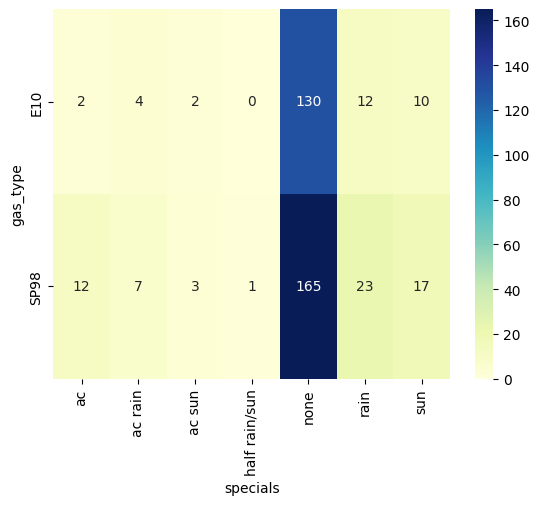

In [378]:
# A heat map for muscle group over force
sns.heatmap(ct_d_g_s, annot=True, cmap="YlGnBu", fmt="d")

In [379]:
ct_d_g_r = pd.crosstab(data['gas_type'], data['refill_gas'])

ct_d_g_r

refill_gas,E10,SP98,no
gas_type,,,
E10,5,0,155
SP98,0,8,220


<Axes: xlabel='refill_gas', ylabel='gas_type'>

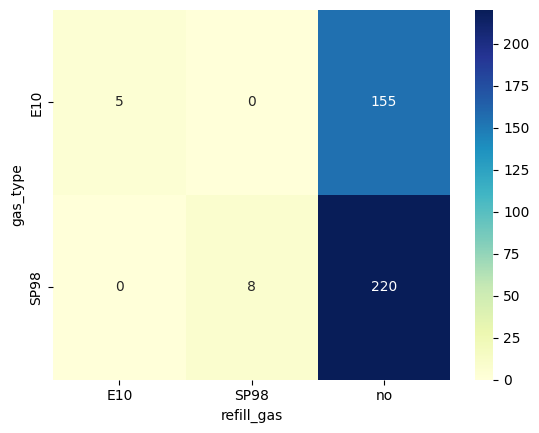

In [380]:
# A heat map for muscle group over force
sns.heatmap(ct_d_g_r, annot=True, cmap="YlGnBu", fmt="d")

In [381]:
ct_d_s_r = pd.crosstab(data['specials'], data['refill_gas'])

ct_d_s_r

refill_gas,E10,SP98,no
specials,,,
ac,0,0,14
ac rain,0,0,11
ac sun,0,0,5
half rain/sun,0,1,0
none,4,6,285
rain,1,1,33
sun,0,0,27


<Axes: xlabel='refill_gas', ylabel='specials'>

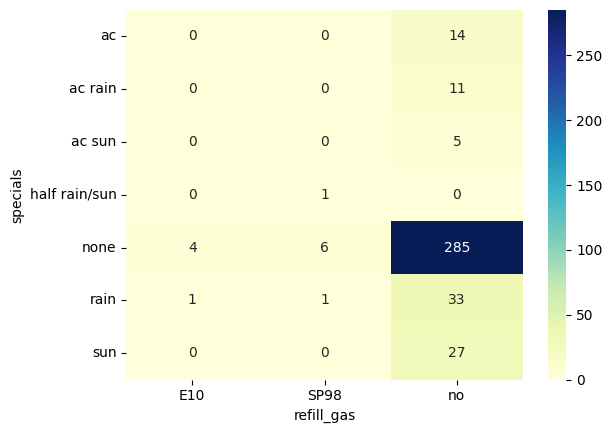

In [382]:
# A heat map for muscle group over force
sns.heatmap(ct_d_s_r, annot=True, cmap="YlGnBu", fmt="d")